In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('API_8_DS2_en_csv_v2_5359551.csv')
male_df = pd.read_csv('API_SP.DYN.AMRT.FE_DS2_en_csv_v2_5359908.csv')
female_df = pd.read_csv('API_SP.DYN.AMRT.MA_DS2_en_csv_v2_5359237.csv')


### To answer:

Live rates in male

Live rates in females

Death rates in males

Death rates in females

In [52]:
# df.head(10)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67825,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.4,NaN,NaN,NaN,NaN,NaN,NaN
67826,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.GOES.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,22.8,NaN,NaN,NaN,NaN,NaN,NaN
67827,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN
67828,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_filtered = df[df['1960'].notnull()]

df_filtered = df_filtered.round(2)

df_filtered

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
7,Aruba,ABW,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.14,49.15,49.16,49.16,49.17,49.17,...,47.63,47.56,47.48,47.41,47.34,47.28,47.21,47.15,47.11,47.13
8,Aruba,ABW,"Population, male",SP.POP.TOTL.MA.IN,26834.00,27431.00,27863.00,28256.00,28608.00,28906.00,...,48632.00,48927.00,49191.00,49430.00,49650.00,49847.00,50026.00,50188.00,50211.00,50207.00
9,Aruba,ABW,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,50.86,50.85,50.85,50.84,50.83,50.82,...,52.37,52.44,52.52,52.59,52.66,52.72,52.79,52.85,52.89,52.87
10,Aruba,ABW,"Population, female",SP.POP.TOTL.FE.IN,27773.00,28380.00,28820.00,29218.00,29570.00,29875.00,...,53480.00,53953.00,54403.00,54828.00,55224.00,55591.00,55935.00,56254.00,56373.00,56330.00
11,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.00,55811.00,56682.00,57475.00,58178.00,58782.00,...,102112.00,102880.00,103594.00,104257.00,104874.00,105439.00,105962.00,106442.00,106585.00,106537.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67804,Zimbabwe,ZWE,"Mortality rate, under-5, male (per 1,000 live ...",SH.DYN.MORT.MA,160.10,155.90,151.80,147.60,143.50,139.40,...,77.40,71.40,67.70,65.50,62.80,60.90,58.40,57.20,56.30,54.00
67805,Zimbabwe,ZWE,"Mortality rate, under-5, female (per 1,000 liv...",SH.DYN.MORT.FE,141.50,137.70,133.60,129.50,125.40,121.50,...,66.60,60.80,57.30,55.30,52.70,51.10,48.70,47.70,47.00,44.80
67806,Zimbabwe,ZWE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,151.10,147.00,142.90,138.70,134.60,130.60,...,72.10,66.20,62.60,60.50,57.90,56.20,53.70,52.70,51.80,49.50
67811,Zimbabwe,ZWE,Number of under-five deaths,SH.DTH.MORT,25877.00,25860.00,25831.00,25755.00,25667.00,25597.00,...,34323.00,31928.00,30323.00,29164.00,27784.00,26931.00,25764.00,25332.00,24956.00,23960.00


In [86]:
df_filtered1 = df_filtered[df_filtered['Country Code'] == 'USA']

df_filtered1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
64012,United States,USA,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,4.956000e+01,4.951000e+01,4.945000e+01,49.4,4.934000e+01,4.926000e+01,...,4.932000e+01,4.937000e+01,4.941000e+01,4.944000e+01,4.948000e+01,4.951000e+01,4.954000e+01,4.956000e+01,4.956000e+01,4.954000e+01
64013,United States,USA,"Population, male",SP.POP.TOTL.MA.IN,8.954283e+07,9.094334e+07,9.224420e+07,93477522.0,9.468301e+07,9.572286e+07,...,1.548132e+08,1.560258e+08,1.573016e+08,1.585806e+08,1.598477e+08,1.609703e+08,1.619119e+08,1.627301e+08,1.643033e+08,1.644133e+08
64014,United States,USA,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,5.044000e+01,5.049000e+01,5.055000e+01,50.6,5.066000e+01,5.074000e+01,...,5.068000e+01,5.063000e+01,5.059000e+01,5.056000e+01,5.052000e+01,5.049000e+01,5.046000e+01,5.044000e+01,5.044000e+01,5.046000e+01
64015,United States,USA,"Population, female",SP.POP.TOTL.FE.IN,9.112817e+07,9.274766e+07,9.429380e+07,95764478.0,9.720599e+07,9.858014e+07,...,1.590644e+08,1.600342e+08,1.610848e+08,1.621584e+08,1.632240e+08,1.641518e+08,1.649263e+08,1.655998e+08,1.671977e+08,1.674805e+08
64016,United States,USA,"Population, total",SP.POP.TOTL,1.806710e+08,1.836910e+08,1.865380e+08,189242000.0,1.918890e+08,1.943030e+08,...,3.138777e+08,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,3.283300e+08,3.315011e+08,3.318937e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,United States,USA,"Mortality rate, under-5, male (per 1,000 live ...",SH.DYN.MORT.MA,3.370000e+01,3.300000e+01,3.240000e+01,31.8,3.100000e+01,3.030000e+01,...,7.700000e+00,7.600000e+00,7.500000e+00,7.400000e+00,7.300000e+00,7.200000e+00,7.200000e+00,7.000000e+00,6.900000e+00,6.800000e+00
64235,United States,USA,"Mortality rate, under-5, female (per 1,000 liv...",SH.DYN.MORT.FE,2.620000e+01,2.580000e+01,2.530000e+01,24.7,2.430000e+01,2.370000e+01,...,6.400000e+00,6.300000e+00,6.200000e+00,6.200000e+00,6.100000e+00,6.000000e+00,5.900000e+00,5.800000e+00,5.700000e+00,5.700000e+00
64236,United States,USA,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,3.010000e+01,2.950000e+01,2.890000e+01,28.3,2.770000e+01,2.710000e+01,...,7.100000e+00,7.000000e+00,6.900000e+00,6.800000e+00,6.700000e+00,6.600000e+00,6.500000e+00,6.400000e+00,6.300000e+00,6.200000e+00
64241,United States,USA,Number of under-five deaths,SH.DTH.MORT,1.193020e+05,1.174670e+05,1.145200e+05,110585.0,1.067400e+05,1.006090e+05,...,2.836500e+04,2.779700e+04,2.742500e+04,2.713300e+04,2.665600e+04,2.595100e+04,2.515100e+04,2.445400e+04,2.368800e+04,2.316200e+04


male and female motality from year 1960 to 2020

In [2]:
male_df2 = male_df.drop(['Indicator Name','Indicator Code','Country Code', 'Country Name','2021'], axis =1)
female_df2 = female_df.drop(['Indicator Name','Indicator Code','Country Code','Country Name','2021'], axis =1)

In [3]:
male_column_sum = male_df2[['1960','1970','1980','1990','2000','2010','2020']].sum()
female_column_sum = female_df2[['1960','1970','1980','1990','2000','2010','2020']].sum()

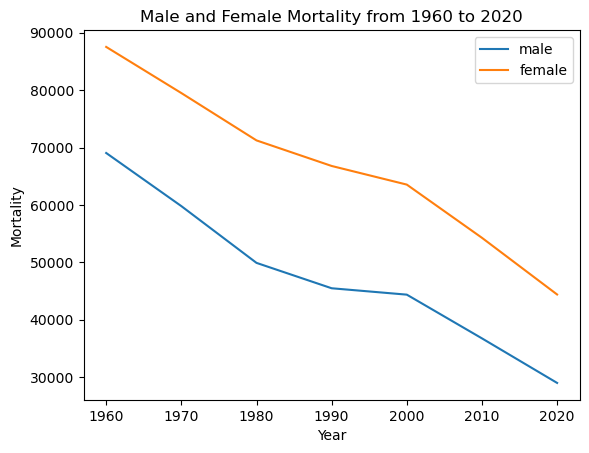

In [4]:
# Plot male and female mortality data
x = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.plot(x, male_column_sum, label='male')
plt.plot(x, female_column_sum, label='female')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Mortality')
plt.title('Male and Female Mortality from 1960 to 2020')

# Show legend and plot
plt.legend()
plt.show()